# Laboratorium 3 - Regresja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ## dla MSE

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)

reg = [] ### obiekty reprezentujące regresory

<AxesSubplot:xlabel='x', ylabel='y'>

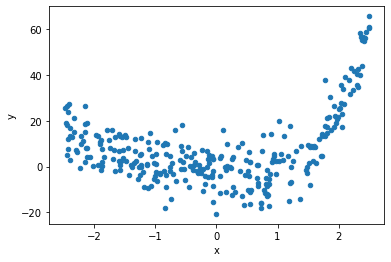

In [2]:
df.plot.scatter(x='x',y='y')

In [3]:
from sklearn.model_selection import train_test_split

#df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)  #zbior uczacy i testujacy w DATAFRAME
#df_train.reset_index(inplace = True)
#df_test.reset_index(inplace = True)

XX = np.array(df['x']).reshape(-1, 1)
yy = np.array(df['y']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.20, random_state = 42)  #zbior uczacy i testujacy

# Regresja Liniowa

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#lin_reg.fit(np.array(df_train['x']).reshape(-1, 1), np.array(df_train['y']).reshape(-1, 1)) ##probowalem ale nie dziala
lin_reg.fit(X_train, y_train)

reg.append((lin_reg, None))

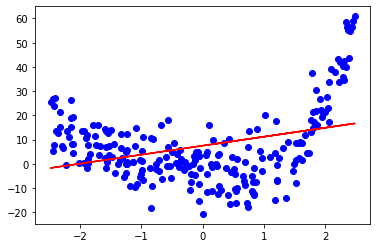

In [5]:
y_pred = lin_reg.predict(X_train) ### na uczącym
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, y_pred, color ='r')

lin_reg__train_mse = mean_squared_error(y_train,y_pred)

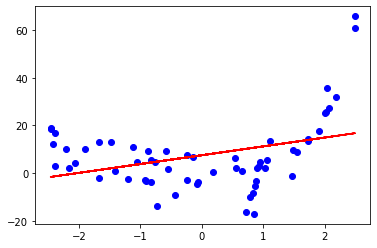

In [6]:
y_pred = lin_reg.predict(X_test) ### na testującym
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')

lin_reg__test_mse = mean_squared_error(y_test,y_pred)

# K-Najbliższych Sasiadow (KNN)
### *k=3*

In [7]:
import sklearn.neighbors
knn_reg3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
knn_reg3.fit(X_train, y_train)

knn_3_reg = knn_reg3
reg.append((knn_3_reg, None))

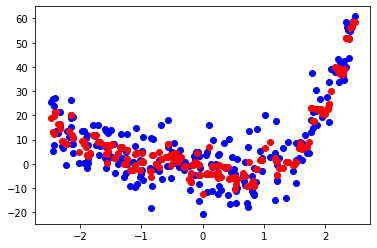

In [8]:
y_pred = knn_reg3.predict(X_train) ### na uczącym
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

knn_3_reg__train_mse = mean_squared_error(y_train,y_pred)

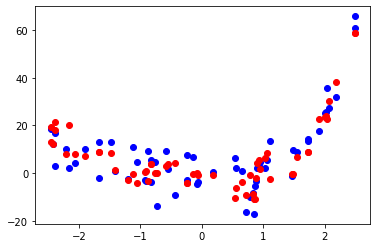

In [9]:
y_pred = knn_reg3.predict(X_test) ### na testującym
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

knn_3_reg__test_mse = mean_squared_error(y_test,y_pred)

### *k=5*

In [10]:
import sklearn.neighbors
knn_reg5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 5)
knn_reg5.fit(X_train, y_train)

knn_5_reg = knn_reg5
reg.append((knn_5_reg, None))

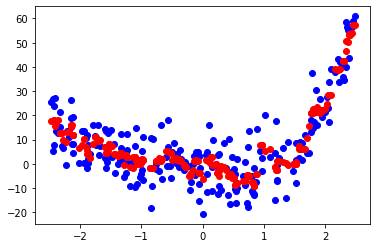

In [11]:
y_pred = knn_reg5.predict(X_train) ### na uczącym
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

knn_5_reg__train_mse = mean_squared_error(y_train,y_pred)

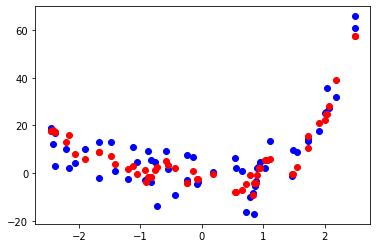

In [12]:
y_pred = knn_reg5.predict(X_test) ### na testującym
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

knn_5_reg__test_mse = mean_squared_error(y_test,y_pred)

# Wielomianowa

In [13]:
from sklearn.preprocessing import PolynomialFeatures

### *degree = 2*

In [14]:
poly_features_2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features_2.fit_transform(X_train)

lin_2_reg = LinearRegression()
lin_2_reg.fit(X_poly, y_train)

reg.append((lin_2_reg, poly_features_2))

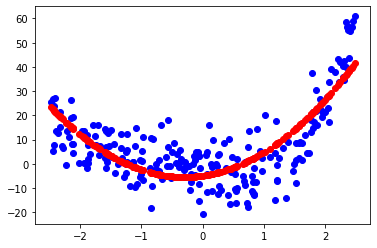

In [15]:
y_pred = lin_2_reg.coef_[0][1] * X_train**2 + lin_2_reg.coef_[0][0] * X_train + lin_2_reg.intercept_[0]
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

poly_2_reg__train_mse = mean_squared_error(y_train,y_pred)

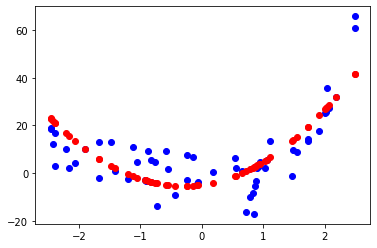

In [16]:
y_pred = lin_2_reg.coef_[0][1] * X_test**2 + lin_2_reg.coef_[0][0] * X_test + lin_2_reg.intercept_[0]
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

poly_2_reg__test_mse = mean_squared_error(y_test,y_pred)

### *degree = 3*

In [17]:
poly_features_3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features_3.fit_transform(X_train)

lin_3_reg = LinearRegression()
lin_3_reg.fit(X_poly, y_train)

reg.append((lin_3_reg, poly_features_3))

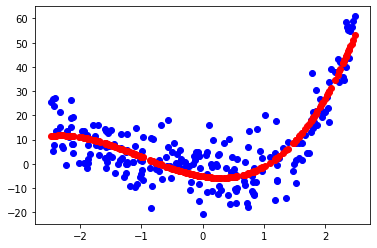

In [18]:
y_pred = lin_3_reg.coef_[0][2] * X_train**3 + lin_3_reg.coef_[0][1] * X_train**2 + lin_3_reg.coef_[0][0] * X_train + lin_3_reg.intercept_[0]
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

poly_3_reg__train_mse = mean_squared_error(y_train,y_pred)

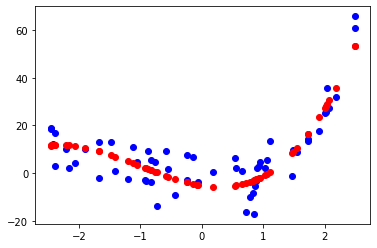

In [19]:
y_pred = lin_3_reg.coef_[0][2] * X_test**3 + lin_3_reg.coef_[0][1] * X_test**2 + lin_3_reg.coef_[0][0] * X_test + lin_3_reg.intercept_[0]
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

poly_3_reg__test_mse = mean_squared_error(y_test,y_pred)

### *degree = 4*

In [20]:
poly_features_4 = PolynomialFeatures(degree = 4, include_bias = False)
X_poly = poly_features_4.fit_transform(X_train)

lin_4_reg = LinearRegression()
lin_4_reg.fit(X_poly, y_train)

reg.append((lin_4_reg, poly_features_4))

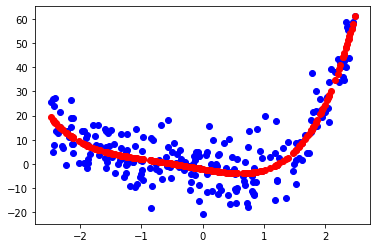

In [21]:
y_pred = lin_4_reg.coef_[0][3] * X_train**4 + lin_4_reg.coef_[0][2] * X_train**3 + lin_4_reg.coef_[0][1] * X_train**2 + lin_4_reg.coef_[0][0] * X_train + lin_4_reg.intercept_[0]
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

poly_4_reg__train_mse = mean_squared_error(y_train,y_pred)

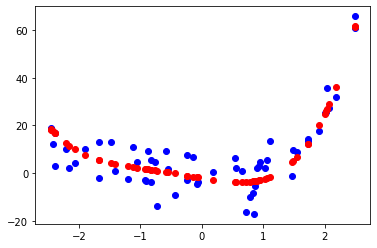

In [22]:
y_pred = lin_4_reg.coef_[0][3] * X_test**4 + lin_4_reg.coef_[0][2] * X_test**3 + lin_4_reg.coef_[0][1] * X_test**2 + lin_4_reg.coef_[0][0] * X_test + lin_4_reg.intercept_[0]
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

poly_4_reg__test_mse = mean_squared_error(y_test,y_pred)

### *degree = 5*

In [23]:
poly_features_5 = PolynomialFeatures(degree = 5, include_bias = False)
X_poly = poly_features_5.fit_transform(X_train)

lin_5_reg = LinearRegression()
lin_5_reg.fit(X_poly, y_train)

reg.append((lin_5_reg, poly_features_5))

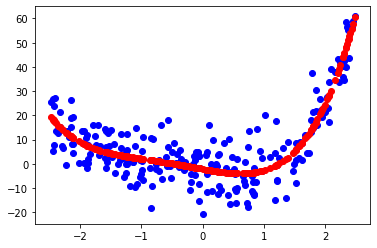

In [24]:
### uczący
y_pred = lin_5_reg.coef_[0][4] * X_train**5 + lin_5_reg.coef_[0][3] * X_train**4 + lin_5_reg.coef_[0][2] * X_train**3 + lin_5_reg.coef_[0][1] * X_train**2 + lin_5_reg.coef_[0][0] * X_train + lin_5_reg.intercept_[0]
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred, color ='r')

poly_5_reg__train_mse = mean_squared_error(y_train,y_pred)

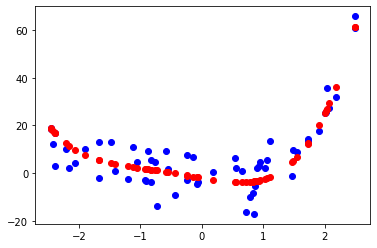

In [25]:
### testujący
y_pred = lin_5_reg.coef_[0][4] * X_test**5 + lin_5_reg.coef_[0][3] * X_test**4 + lin_5_reg.coef_[0][2] * X_test**3 + lin_5_reg.coef_[0][1] * X_test**2 + lin_5_reg.coef_[0][0] * X_test + lin_5_reg.intercept_[0]
plt.scatter(X_test, y_test, color ='b')
plt.scatter(X_test, y_pred, color ='r')

poly_5_reg__test_mse = mean_squared_error(y_test,y_pred)

### MSE i REG

In [26]:
data = {'train_mse':[lin_reg__train_mse, knn_3_reg__train_mse, knn_5_reg__train_mse, poly_2_reg__train_mse, poly_3_reg__train_mse, poly_4_reg__train_mse, poly_5_reg__train_mse],
         'test_mse':[lin_reg__test_mse, knn_3_reg__test_mse, knn_5_reg__test_mse, poly_2_reg__test_mse, poly_3_reg__test_mse, poly_4_reg__test_mse, poly_5_reg__test_mse]}

In [27]:
mse = pd.DataFrame(data, index=["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"])
print(mse)

             train_mse    test_mse
lin_reg     218.110524  199.075443
knn_3_reg    40.694877   53.981103
knn_5_reg    48.502615   47.417338
poly_2_reg   86.504078   79.901332
poly_3_reg   64.216125   47.853655
poly_4_reg   55.849025   42.642620
poly_5_reg   55.843789   42.748887


In [28]:
reg

[(LinearRegression(), None),
 (KNeighborsRegressor(n_neighbors=3), None),
 (KNeighborsRegressor(), None),
 (LinearRegression(), PolynomialFeatures(include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]

### Zapisanie plików

In [29]:
import pickle

In [30]:
with open('mse.pkl','wb') as f: pickle.dump(mse, f)

In [31]:
with open('reg.pkl','wb') as f: pickle.dump(reg, f)

### Sprawdzenie zawartości plików

In [32]:
with open('mse.pkl','rb') as file: print(pickle.load(file))

             train_mse    test_mse
lin_reg     218.110524  199.075443
knn_3_reg    40.694877   53.981103
knn_5_reg    48.502615   47.417338
poly_2_reg   86.504078   79.901332
poly_3_reg   64.216125   47.853655
poly_4_reg   55.849025   42.642620
poly_5_reg   55.843789   42.748887


In [33]:
with open('reg.pkl','rb') as file: print(pickle.load(file))

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
